In [1]:
# 0) 필요 시 라이브러리 설치
# !pip install scikit-learn pandas matplotlib

# 1) 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 2) 데이터 불러오기 & 전처리
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])
df['Day'] = (df['Date'] - df['Date'].min()).dt.days  # 날짜를 0부터 시작하는 정수로 변환


In [28]:
# 3) 특성(X), 타깃(y) 정의
X = df[['Day']]
y = df['Temp']

print(X.count())

# 4) 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Day    3650
dtype: int64


MSE   : 5.343021377473364
R²    : 0.6879593721585393


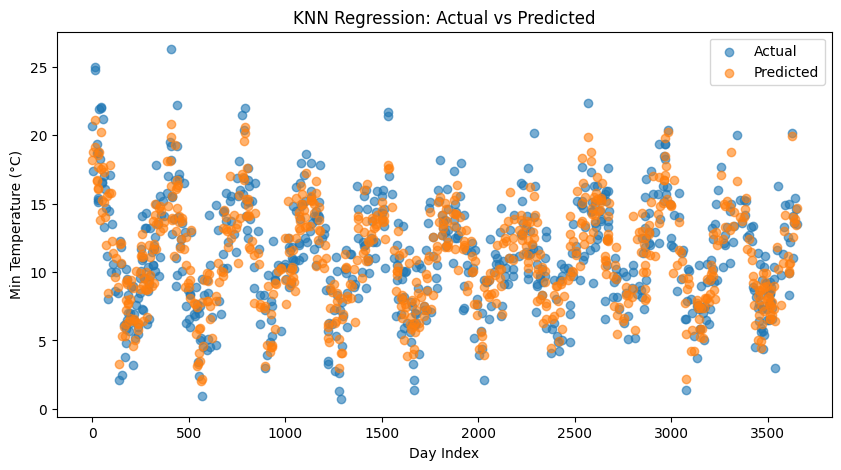

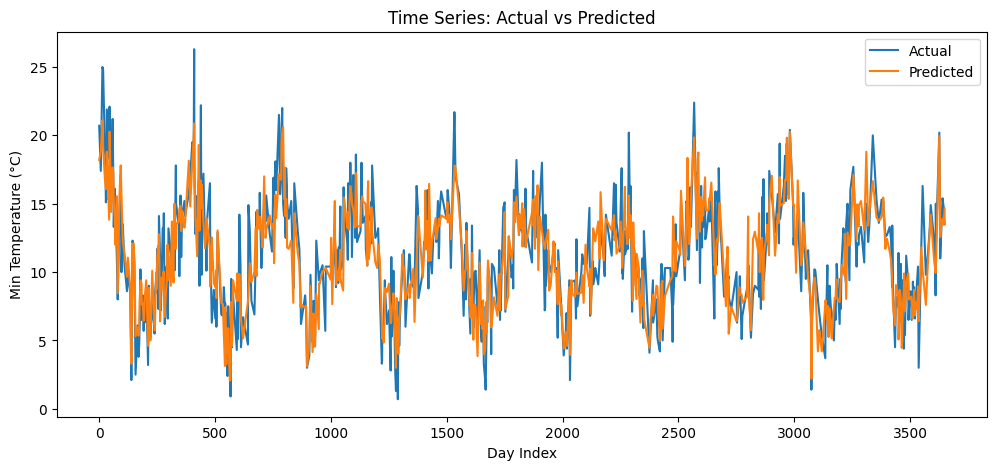

In [29]:
# 5) KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=2, weights='distance', p=2)
knn.fit(X_train, y_train)

# 6) 예측 및 평가
y_pred = knn.predict(X_test)
print("MSE   :", mean_squared_error(y_test, y_pred))
print("R²    :", r2_score(y_test, y_pred))

# 7) Actual vs Predicted 산점도
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Day'], y_test, label='Actual', alpha=0.6)
plt.scatter(X_test['Day'], y_pred, label='Predicted', alpha=0.6)
plt.xlabel('Day Index')
plt.ylabel('Min Temperature (°C)')
plt.title('KNN Regression: Actual vs Predicted')
plt.legend()
plt.show()

# 8) 시간 순 시계열 플롯
test_df = X_test.copy()
test_df['Actual'] = y_test.values
test_df['Predicted'] = y_pred
test_df = test_df.sort_values('Day')

plt.figure(figsize=(12, 5))
plt.plot(test_df['Day'], test_df['Actual'], label='Actual')
plt.plot(test_df['Day'], test_df['Predicted'], label='Predicted')
plt.xlabel('Day Index')
plt.ylabel('Min Temperature (°C)')
plt.title('Time Series: Actual vs Predicted')
plt.legend()
plt.show()


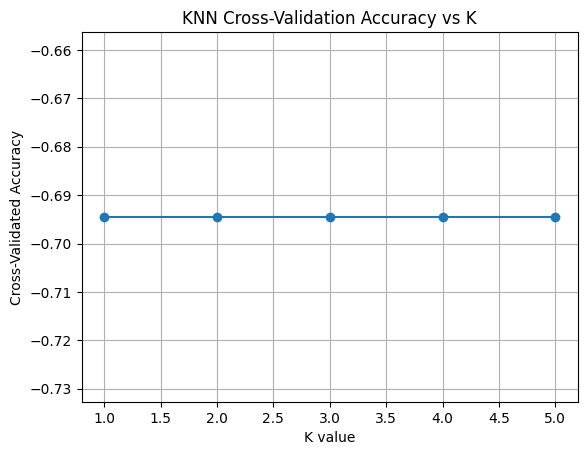

최적의 K: 1
MSE   : 5.27026400304414
R²    : 0.6613637737259583


In [30]:

from sklearn.model_selection import cross_val_score


threshold = 25
filtered_df = df[df['Temp'] < threshold ].copy()
# 3) 특성(X), 타깃(y) 정의
X = filtered_df[['Day']]
y = filtered_df['Temp']


# 4) 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k_range = range(1, 6)
cv_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=2, weights='distance', p=2)
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())

# 결과 시각화
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('K value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation Accuracy vs K')
plt.grid(True)
plt.show()

# 최적 K 출력
best_k = k_range[cv_scores.index(max(cv_scores))]
print("최적의 K:", best_k)  

# 5) KNN 회귀 모델 학습
knn = KNeighborsRegressor(n_neighbors=2, weights='distance', p=2)
knn.fit(X_train, y_train)

# 6) 예측 및 평가
y_pred = knn.predict(X_test)
print("MSE   :", mean_squared_error(y_test, y_pred))
print("R²    :", r2_score(y_test, y_pred))


# # 7) Actual vs Predicted 산점도
# plt.figure(figsize=(10, 5))
# plt.scatter(X_test['Day'], y_test, label='Actual', alpha=0.6)
# plt.scatter(X_test['Day'], y_pred, label='Predicted', alpha=0.6)
# plt.xlabel('Day Index')
# plt.ylabel('Min Temperature (°C)')
# plt.title('KNN Regression: Actual vs Predicted')
# plt.legend()
# plt.show()